In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.utils import resample
from pycaret.classification import *
from pycaret.regression import *
from catboost import CatBoostClassifier ,CatBoostRegressor
from xgboost import XGBClassifier ,XGBRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# классификация
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# регрессия
from sklearn.tree import DecisionTreeRegressor
# метрики
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier, StackingRegressor

## Задание №1.
Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов
 данных своего варианта. Осуществить настройку гиперпараметров. 
Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила.
 Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret 
(открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)


In [2]:
data_regress = pd.read_csv('D:\python\data\kc_house_data3.csv')

In [3]:
data_classification = pd.read_csv('D:\python\data\card_transdata4.csv')

# Для регрессии

In [4]:
data_regress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14934 entries, 0 to 14933
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14934 non-null  int64  
 1   id             14934 non-null  int64  
 2   date           14934 non-null  int64  
 3   price          14934 non-null  int64  
 4   bedrooms       14934 non-null  int64  
 5   bathrooms      14934 non-null  float64
 6   sqft_living    14934 non-null  int64  
 7   sqft_lot       14934 non-null  int64  
 8   floors         14934 non-null  int64  
 9   waterfront     14934 non-null  int64  
 10  view           14934 non-null  int64  
 11  condition      14934 non-null  int64  
 12  grade          14934 non-null  int64  
 13  sqft_above     14934 non-null  int64  
 14  sqft_basement  14934 non-null  int64  
 15  yr_built       14934 non-null  int64  
 16  yr_renovated   14934 non-null  int64  
 17  zipcode        14934 non-null  int64  
 18  lat   

In [42]:
data_regress.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
data_regress.rename(columns={'sqft_living': 'sqftliving', 'sqft_lot': 'sqftlot', 'sqft_above': 'sqftabove', 'sqft_basement': 'sqftbasement',
                   'yr_built': 'yrbuilt', 'yr_renovated': 'yrrenovated',
                   'sqft_living15': 'sqftliving15', 'sqft_lot15': 'sqftlot15'}, inplace=True)

In [44]:
data_regress.head(5)

,id,date,price,bedrooms,bathrooms,sqftliving,sqftlot,floors,waterfront,view,...,grade,sqftabove,sqftbasement,yrbuilt,yrrenovated,zipcode,lat,long,sqftliving15,sqftlot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,5631500400,20150225,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2487200875,20141209,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,1954400510,20150218,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627,257500,3,2.25,1715,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [45]:
X_regress = data_regress.drop('price', axis=1)
y_regress = data_regress['price']
X_train_regress, X_test_regress, y_train_regress, y_test_regress = train_test_split(X_regress, y_regress, test_size=0.2, random_state=42)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0}
Mean Absolute Error: 56353.28824387152
Mean Squared Error: 6555517187.3057995
R-squared (R2): 0.7997997098610314


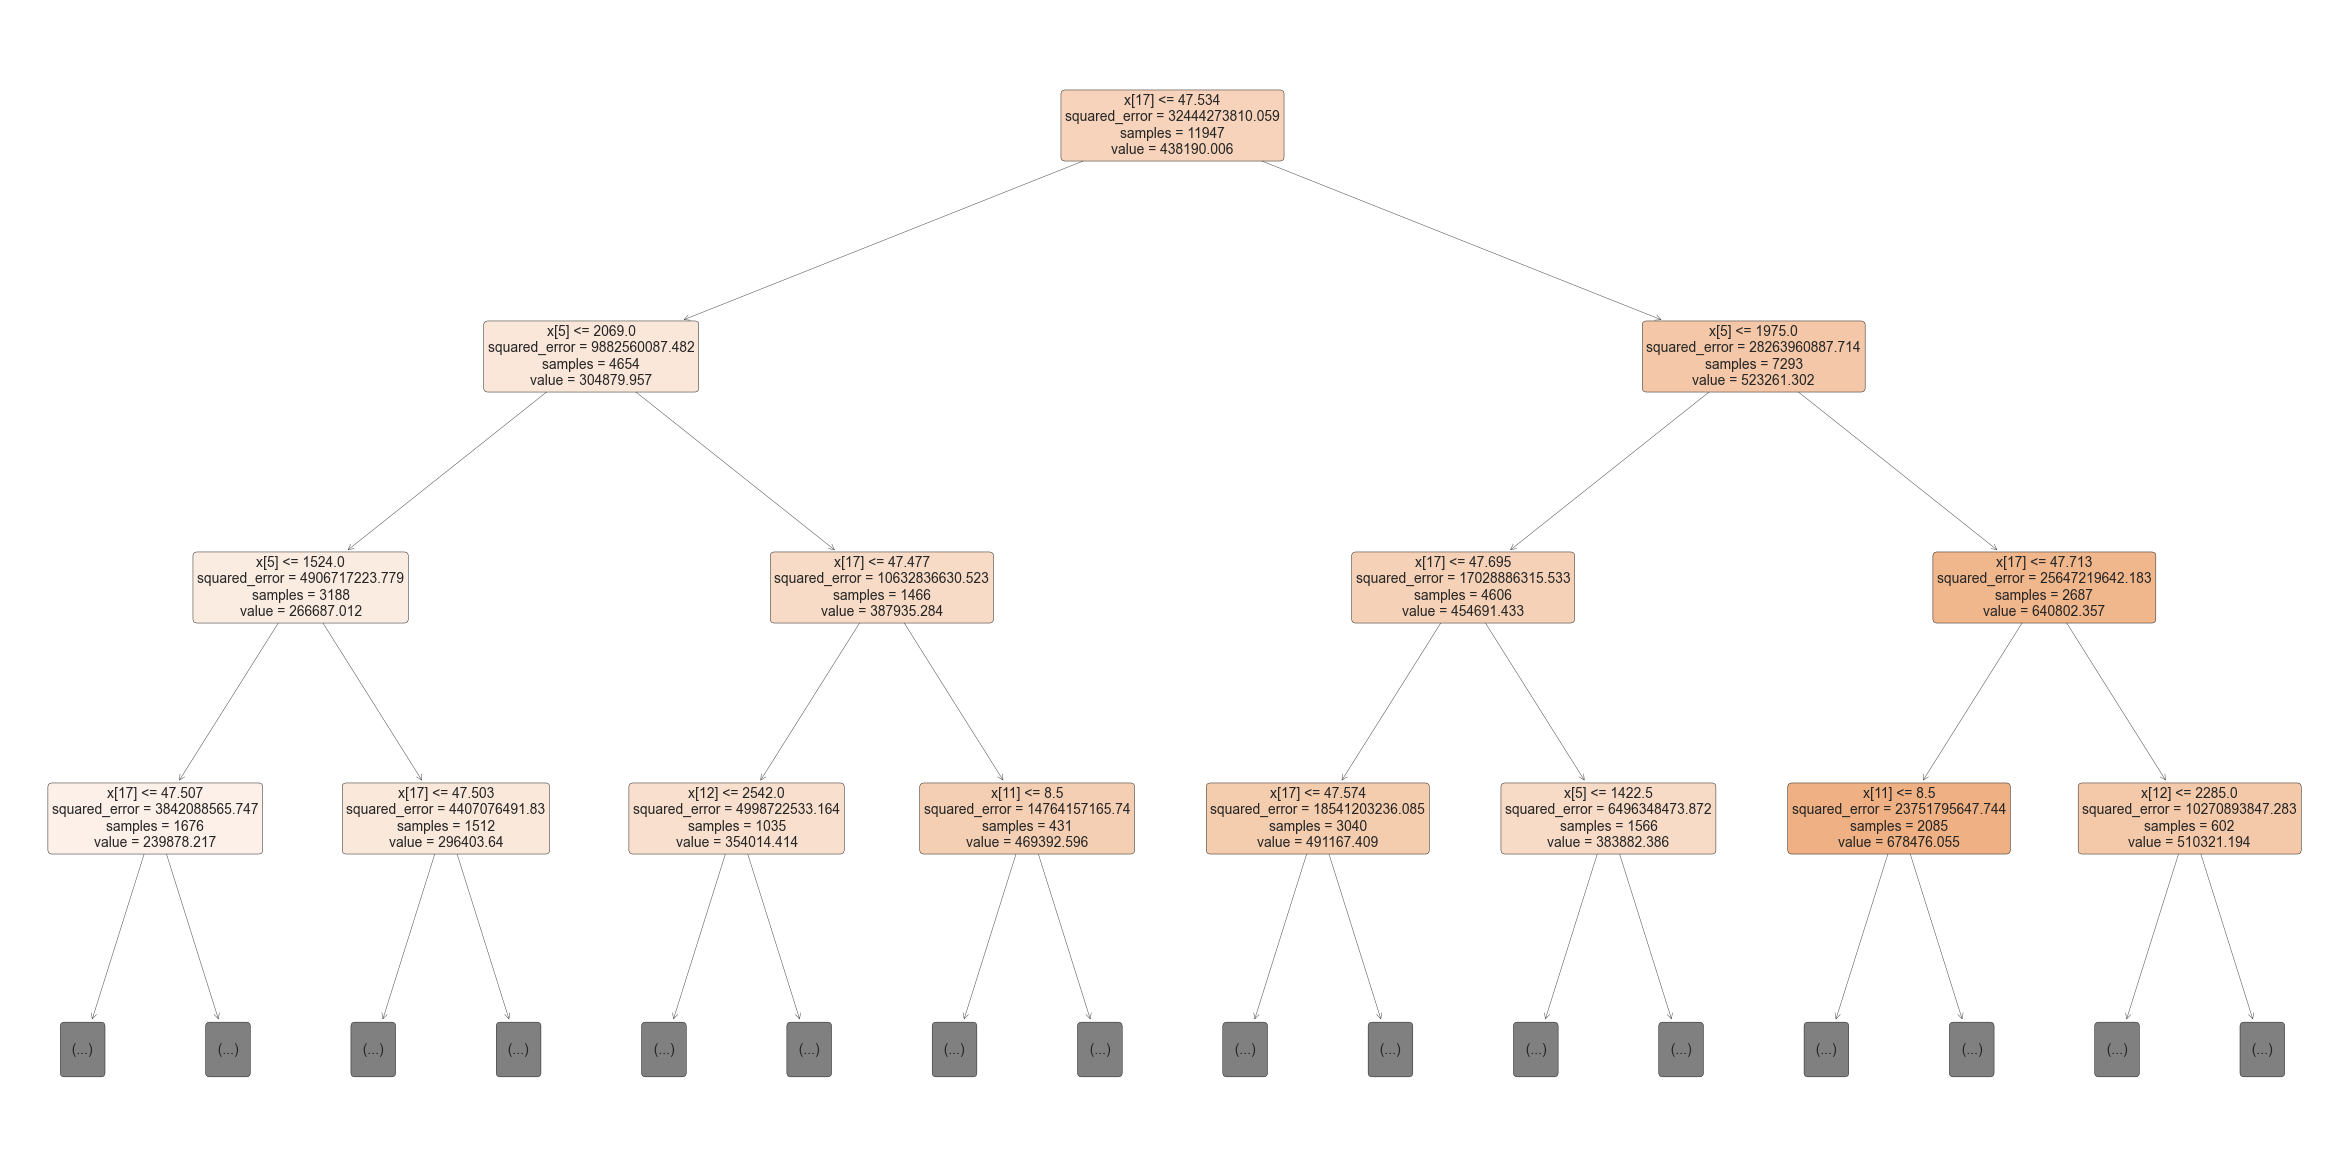

In [21]:
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [3, 4], #Минимальное количество объектов для разделения узла 
    'min_samples_leaf': [4, 7, 10], #Минимальное количество объектов в листовом узле 
    'min_weight_fraction_leaf':[0, 0.01] #Определяет минимальный вес доли образцов в листе.
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_regress, y_train_regress)
print(f'Best parameters: {grid_search.best_params_}')
y_pred_regress = grid_search.best_estimator_.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regress)
mse = mean_squared_error(y_test_regress, y_pred_regress)
r2 = r2_score(y_test_regress, y_pred_regress)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

best_model = grid_search.best_estimator_
plt.figure(figsize=(30, 15))
plot_tree(
    best_model,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3 
)
plt.show()

In [8]:
# решающие правила
tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)

|--- lat <= 47.53
|   |--- sqft_living <= 2069.00
|   |   |--- sqft_living <= 1524.00
|   |   |   |--- lat <= 47.51
|   |   |   |   |--- sqft_living <= 1245.00
|   |   |   |   |   |--- sqft_living <= 985.00
|   |   |   |   |   |   |--- lat <= 47.41
|   |   |   |   |   |   |   |--- condition <= 3.50
|   |   |   |   |   |   |   |   |--- date <= 20141114.00
|   |   |   |   |   |   |   |   |   |--- value: [138531.25]
|   |   |   |   |   |   |   |   |--- date >  20141114.00
|   |   |   |   |   |   |   |   |   |--- value: [175111.54]
|   |   |   |   |   |   |   |--- condition >  3.50
|   |   |   |   |   |   |   |   |--- long <= -122.10
|   |   |   |   |   |   |   |   |   |--- sqft_living15 <= 1130.00
|   |   |   |   |   |   |   |   |   |   |--- value: [155108.67]
|   |   |   |   |   |   |   |   |   |--- sqft_living15 >  1130.00
|   |   |   |   |   |   |   |   |   |   |--- value: [190739.75]
|   |   |   |   |   |   |   |   |--- long >  -122.10
|   |   |   |   |   |   |   |   |   |--- value: [

In [9]:
regression_setup = setup(data_regress, target='price')
best_model = compare_models() # вроде это то что появляются модели
regression_model = create_model(best_model) # Создаем модель
tuned_regression_model = tune_model(regression_model) # оптимизация модели (ищет гиперпараметры)
final_regression_model = finalize_model(tuned_regression_model) # кароче конечная версия модели

predictions = predict_model(final_regression_model, data_regress)
print(predictions)

,Description,Value
0,Session id,5703
1,Target,price
2,Target type,Regression
3,Original data shape,"(14934, 22)"
4,Transformed data shape,"(14934, 22)"
5,Transformed train set shape,"(10453, 22)"
6,Transformed test set shape,"(4481, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,43703.2288,3880175164.6331,62260.0531,0.8807,0.1464,0.1089,0.0770
rf,Random Forest Regressor,46436.5100,4465371054.0123,66793.1480,0.8627,0.1552,0.1153,1.1480
et,Extra Trees Regressor,46073.2708,4516348799.2392,67157.8489,0.8611,0.1552,0.1144,0.4010
gbr,Gradient Boosting Regressor,50532.3643,5096202379.4507,71362.7940,0.8433,0.1631,0.1247,0.3770
ada,AdaBoost Regressor,76222.4629,8897958878.4103,94301.3145,0.7264,0.2456,0.2185,0.1380
dt,Decision Tree Regressor,67129.6502,9394282700.7261,96882.4172,0.7112,0.2215,0.1634,0.0280
ridge,Ridge Regression,79905.4026,11308003075.3152,106305.4454,0.6528,0.2551,0.1986,0.0100
llar,Lasso Least Angle Regression,79908.6901,11307788442.5099,106304.3804,0.6528,0.2552,0.1986,0.0110
br,Bayesian Ridge,79906.6531,11307903214.2043,106304.9551,0.6528,0.2551,0.1986,0.0120
lasso,Lasso Regression,79908.6902,11307788402.6056,106304.3802,0.6528,0.2552,0.1986,0.2390


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44492.7343,4027233255.7094,63460.4858,0.8811,0.1464,0.1095
1,42873.4917,3762719780.3629,61341.0122,0.8837,0.1461,0.1091
2,41741.3267,3598178371.1787,59984.8178,0.8946,0.1418,0.1040
3,44221.5229,4142145700.4745,64359.5036,0.8812,0.1503,0.1092
4,43425.6894,3940261168.1322,62771.4996,0.8814,0.1488,0.1087
5,44093.6271,3940138174.9248,62770.5200,0.8787,0.1511,0.1122
6,43489.6527,3927890256.7279,62672.8829,0.8752,0.1504,0.1095
7,43358.4145,3649286955.2919,60409.3284,0.8815,0.1445,0.1094
8,46518.6791,4326326926.7041,65774.8199,0.8565,0.1510,0.1148


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44831.2686,4050634874.4356,63644.5982,0.8804,0.1465,0.1104
1,43810.4561,3916210717.3964,62579.6350,0.8790,0.1480,0.1111
2,42814.8596,3613539659.0735,60112.7246,0.8941,0.1453,0.1080
3,45043.4474,4194277495.9217,64763.2419,0.8798,0.1533,0.1116
4,44599.8355,4104829425.3765,64068.9428,0.8764,0.1524,0.1124
5,43867.0136,3788890751.7713,61553.9662,0.8833,0.1494,0.1111
6,43425.9691,3877569344.7621,62270.1320,0.8768,0.1503,0.1101
7,45412.4744,3845942081.8401,62015.6600,0.8751,0.1525,0.1167
8,47269.5110,4456815981.2910,66759.3887,0.8522,0.1551,0.1174


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,36300.1742,2537342944.6827,50372.0453,0.9219,0.1256,0.0926


       Unnamed: 0          id      date  bedrooms  bathrooms  sqft_living  \
0               0  7129300520  20141013         3       1.00         1180   
1               1  5631500400  20150225         2       1.00          770   
2               2  2487200875  20141209         4       3.00         1960   
3               3  1954400510  20150218         3       2.00         1680   
4               4  1321400060  20140627         3       2.25         1715   
...           ...         ...       ...       ...        ...          ...   
14929       14929   263000018  20140521         3       2.50         1530   
14930       14930  6600060120  20150223         4       2.50         2310   
14931       14931  1523300141  20140623         2       0.75         1020   
14932       14932   291310100  20150116         3       2.50         1600   
14933       14933  1523300157  20141015         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \


# Классификация

In [7]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561043 entries, 0 to 561042
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      561043 non-null  int64  
 1   distance_from_home              561043 non-null  float64
 2   distance_from_last_transaction  561043 non-null  float64
 3   ratio_to_median_purchase_price  561043 non-null  float64
 4   repeat_retailer                 561043 non-null  float64
 5   used_chip                       561043 non-null  float64
 6   used_pin_number                 561043 non-null  float64
 7   online_order                    561043 non-null  float64
 8   fraud                           561043 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 38.5 MB


In [8]:
data_classification.head(5)

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
data_classification.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561043 entries, 0 to 561042
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              561043 non-null  float64
 1   distance_from_last_transaction  561043 non-null  float64
 2   ratio_to_median_purchase_price  561043 non-null  float64
 3   repeat_retailer                 561043 non-null  float64
 4   used_chip                       561043 non-null  float64
 5   used_pin_number                 561043 non-null  float64
 6   online_order                    561043 non-null  float64
 7   fraud                           561043 non-null  float64
dtypes: float64(8)
memory usage: 34.2 MB


In [11]:
# появилась проблема с долгой загрузкой, поэтому уменьшаю датасет:
# Разделяем датасет на классы
class_0 = data_classification[data_classification['fraud'] == 0]
class_1 = data_classification[data_classification['fraud'] == 1]
class_0_downsampled = resample(class_0, replace=False, n_samples=int(0.1 * len(class_0)), random_state=42)# Уменьшаем размер подвыборки для класса 0
small_data_classification = pd.concat([class_0_downsampled, class_1])# Объединяем данные обратно
small_data_classification = small_data_classification.sample(frac=1, random_state=42)# Перемешиваем данные, чтобы сохранить случайность

In [12]:
small_data_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62902 entries, 325784 to 81544
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              62902 non-null  float64
 1   distance_from_last_transaction  62902 non-null  float64
 2   ratio_to_median_purchase_price  62902 non-null  float64
 3   repeat_retailer                 62902 non-null  float64
 4   used_chip                       62902 non-null  float64
 5   used_pin_number                 62902 non-null  float64
 6   online_order                    62902 non-null  float64
 7   fraud                           62902 non-null  float64
dtypes: float64(8)
memory usage: 4.3 MB


In [39]:
X_classif = small_data_classification.drop('fraud', axis=1)
y_classif = small_data_classification['fraud']
X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(X_classif, y_classif, test_size=0.2, random_state=42)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


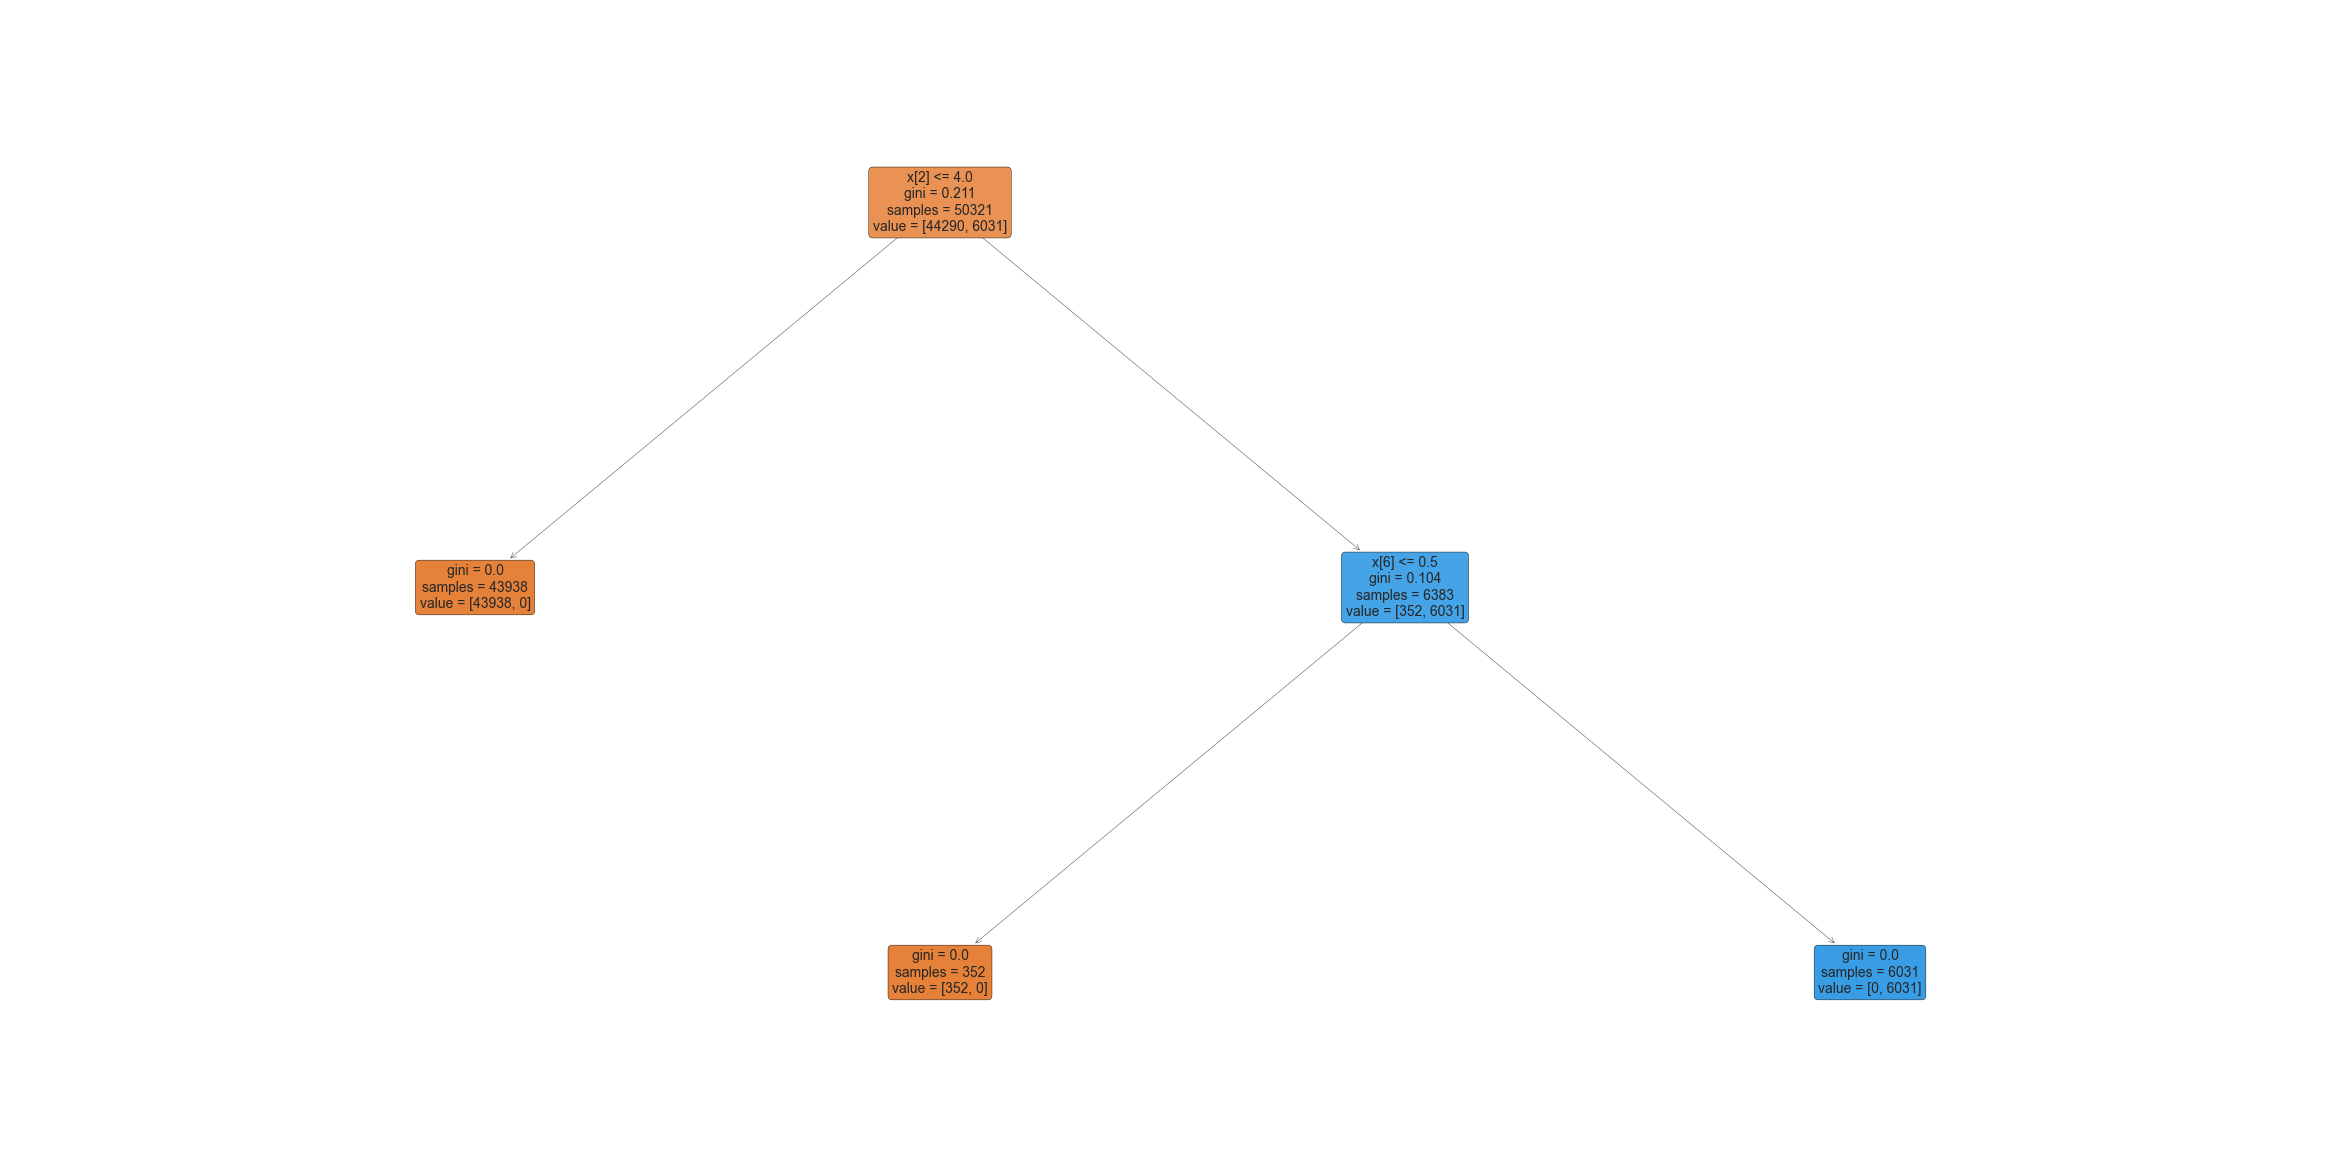

In [25]:
model_classif = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [5, 7],
    'min_samples_split': [2, 3], #Минимальное количество объектов для разделения узла 
    'min_samples_leaf': [2, 3], #Минимальное количество объектов в листовом узле 
    'min_weight_fraction_leaf':[0, 0.01] #Определяет минимальный вес доли образцов в листе.
}
grid_search = GridSearchCV(model_classif, param_grid, cv=5)
grid_search.fit(X_train_classif, y_train_classif)
print(f'Best parameters: {grid_search.best_params_}')
y_pred_classif = grid_search.best_estimator_.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classif)
precision = precision_score(y_test_classif, y_pred_classif)
recall = recall_score(y_test_classif, y_pred_classif)
f1 = f1_score(y_test_classif, y_pred_classif)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

best_model = grid_search.best_estimator_
plt.figure(figsize=(30, 15))
plot_tree(
    best_model,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3 
)
plt.show()

In [16]:
# решающие правила
tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)

|--- ratio_to_median_purchase_price <= 4.00
|   |--- class: 0.0
|--- ratio_to_median_purchase_price >  4.00
|   |--- online_order <= 0.50
|   |   |--- class: 0.0
|   |--- online_order >  0.50
|   |   |--- class: 1.0



In [19]:
classification_setup = setup(small_data_classification, target='fraud')
best_model = compare_models() # вроде это то что появляются модели
classification_model = create_model(best_model, max_depth=3) # Создаем модель
tuned_classification_model = tune_model(classification_model, n_iter=2) # оптимизация модели (ищет гиперпараметры)
final_classification_model = finalize_model(tuned_classification_model) # кароче конечная версия модели

predictions = predict_model(final_classification_model, small_data_classification)
print(predictions)

,Description,Value
0,Session id,8643
1,Target,fraud
2,Target type,Regression
3,Original data shape,"(62902, 8)"
4,Transformed data shape,"(62902, 8)"
5,Transformed train set shape,"(44031, 8)"
6,Transformed test set shape,"(18871, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0260
rf,Random Forest Regressor,0.0000,0.0000,0.0003,1.0000,0.0002,0.0000,0.1940
ada,AdaBoost Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0280
gbr,Gradient Boosting Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.3830
et,Extra Trees Regressor,0.0000,0.0000,0.0025,0.9999,0.0019,0.0001,0.0730
lightgbm,Light Gradient Boosting Machine,0.0017,0.0008,0.0266,0.9928,0.0184,0.0076,0.0800
knn,K Neighbors Regressor,0.0155,0.0088,0.0937,0.9166,0.0679,0.0359,0.0450
lar,Least Angle Regression,0.1609,0.0456,0.2136,0.5694,0.1628,0.3784,0.0220
br,Bayesian Ridge,0.1609,0.0456,0.2136,0.5694,0.1628,0.3785,0.0230
ridge,Ridge Regression,0.1609,0.0456,0.2136,0.5694,0.1628,0.3784,0.0220


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0002,0.0151,0.9978,0.0104,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


        distance_from_home  distance_from_last_transaction  \
325784            3.446846                        6.678585   
501270            4.478820                        0.250544   
89111            10.477938                        0.038198   
524065            8.310688                        0.389647   
518088            5.408738                        0.018418   
...                    ...                             ...   
536764            3.613569                        3.843077   
426123            7.286992                        0.095419   
219001           11.832253                        0.006005   
423775            8.284955                        0.163379   
81544             3.034484                        0.095926   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
325784                        4.046159              1.0        1.0   
501270                        0.162820              1.0        1.0   
89111                         2.367485       

## Задание 2
Применить ансамбли для наборов данных своего варианта:

o BaggingClassifier
o BaggingRegressor

o GradientBoostingClassifier
o GradientBoostingRegressor

o StackingClassifier
o StackingRegressorgressor

Выполнить оценку качества моделей и выбрать лучшую модель.

In [23]:
# Bagging
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_classif, y_train_classif)
y_pred_classification = bagging_classifier.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classification)
precision = precision_score(y_test_classif, y_pred_classification)
recall = recall_score(y_test_classif, y_pred_classification)
f1 = f1_score(y_test_classif, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [24]:
bagging_regressor = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_train_regress, y_train_regress)
y_pred_regression = bagging_regressor.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regression)
mse = mean_squared_error(y_test_regress, y_pred_regression)
r2 = r2_score(y_test_regress, y_pred_regression)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error: 48010.552728490125
Mean Squared Error: 4829171609.3836355
R-squared (R2): 0.8525209331764697


In [28]:
# Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_classifier.fit(X_train_classif, y_train_classif)
y_pred_classification = gradient_boosting_classifier.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classification)
precision = precision_score(y_test_classif, y_pred_classification)
recall = recall_score(y_test_classif, y_pred_classification)
f1 = f1_score(y_test_classif, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [34]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
gradient_boosting_regressor.fit(X_train_regress, y_train_regress)
y_pred_regression = gradient_boosting_regressor.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regression)
mse = mean_squared_error(y_test_regress, y_pred_regression)
r2 = r2_score(y_test_regress, y_pred_regression)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error: 46555.60915083176
Mean Squared Error: 4384262962.546028
R-squared (R2): 0.8661080900150946


In [37]:
# Stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42))
]
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train_classif, y_train_classif)
y_pred_classification = stacking_classifier.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classification)
precision = precision_score(y_test_classif, y_pred_classification)
recall = recall_score(y_test_classif, y_pred_classification)
f1 = f1_score(y_test_classif, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [40]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42))
]
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_regressor.fit(X_train_regress, y_train_regress)
y_pred_regression = stacking_regressor.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regression)
mse = mean_squared_error(y_test_regress, y_pred_regression)
r2 = r2_score(y_test_regress, y_pred_regression)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error: 45271.27428025652
Mean Squared Error: 4337410390.74961
R-squared (R2): 0.8675389303590972


Для классификации - все модели справились на отлично но быстрее всех был bagging
Для регрессии - лучше всех был Stacking, но не намного отличается от остальных ансамблей

## Задание 3

Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:

o Catboost,
o XGBoost,
o LightGBM

Выполнить оценку качества моделей и выбрать лучшую модель.

In [19]:
catboost_classifier = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.01, random_state=42)
catboost_classifier.fit(X_train_classif, y_train_classif, verbose=100)
y_pred_classification = catboost_classifier.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classification)
precision = precision_score(y_test_classif, y_pred_classification)
recall = recall_score(y_test_classif, y_pred_classification)
f1 = f1_score(y_test_classif, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

0:	learn: 0.6834786	total: 23.1ms	remaining: 2.28s
99:	learn: 0.2077788	total: 865ms	remaining: 0us
Accuracy: 0.9984897861855179
Precision: 0.9876783398184177
Recall: 1.0
F1 Score: 0.9938009787928223


In [21]:
catboost_regressor = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, random_state=42)
catboost_regressor.fit(X_train_regress, y_train_regress, verbose=100)
y_pred_regression = catboost_regressor.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regression)
mse = mean_squared_error(y_test_regress, y_pred_regression)
r2 = r2_score(y_test_regress, y_pred_regression)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

0:	learn: 168772.6831612	total: 4.09ms	remaining: 405ms
99:	learn: 63863.2058517	total: 304ms	remaining: 0us
Mean Absolute Error: 47250.579919571035
Mean Squared Error: 4477453015.253984
R-squared (R2): 0.8632621397937564


In [23]:
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train_classif, y_train_classif, verbose=0)
y_pred_classification = xgb_classifier.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classification)
precision = precision_score(y_test_classif, y_pred_classification)
recall = recall_score(y_test_classif, y_pred_classification)
f1 = f1_score(y_test_classif, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9982513313727048
Precision: 0.9908436886854153
Recall: 0.9947472094550229
F1 Score: 0.9927916120576671


In [25]:
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train_regress, y_train_regress, verbose=0)
y_pred_regression = xgb_regressor.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regression)
mse = mean_squared_error(y_test_regress, y_pred_regression)
r2 = r2_score(y_test_regress, y_pred_regression)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error: 50161.65745313023
Mean Squared Error: 5108317780.222643
R-squared (R2): 0.8439960307475098


In [31]:
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, random_state=42)
lgbm_classifier.fit(X_train_classif, y_train_classif)
y_pred_classification = lgbm_classifier.predict(X_test_classif)

accuracy = accuracy_score(y_test_classif, y_pred_classification)
precision = precision_score(y_test_classif, y_pred_classification)
recall = recall_score(y_test_classif, y_pred_classification)
f1 = f1_score(y_test_classif, y_pred_classification)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

[LightGBM] [Info] Number of positive: 6031, number of negative: 44290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 50321, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119851 -> initscore=-1.993846
[LightGBM] [Info] Start training from score -1.993846
Accuracy: 0.9992846355615611
Precision: 1.0
Recall: 0.9940906106369009
F1 Score: 0.99703654922621


In [47]:
lgbm_regressor = LGBMRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, random_state=42)
lgbm_regressor.fit(X_train_regress, y_train_regress)
y_pred_regression = lgbm_regressor.predict(X_test_regress)

mae = mean_absolute_error(y_test_regress, y_pred_regression)
mse = mean_squared_error(y_test_regress, y_pred_regression)
r2 = r2_score(y_test_regress, y_pred_regression)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 11947, number of used features: 17
[LightGBM] [Info] Start training from score 438190.005608
Mean Absolute Error: 54148.04614053714
Mean Squared Error: 6031553058.696968
R-squared (R2): 0.8158011583467475
